In [7]:
#import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#instatiate data variables for RVs (km/s)

V1481A = np.array([24.36, -17.04, 13.26, 59.44, 45.43, -8.61, -9.37, 20.98, 63.91, -2.29, 55.55])
V1481B = np.array([96.34, 45.27, -43.73, -24.96, 78.60, 82.46, -50.16, 70.06, -37.94])
JD     = np.array([2453658.8320, 2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453678.7838, 2453679.7282, 2453753.6614, 2453755.6823])
JDB    = np.array([2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453679.7282, 2453753.6614, 2453755.6823])

V1481P = 4.433 #days

DQTau1 = np.array([34.76, -2.93, 37.11, 37.38, 34.73, 31.64, 26.07, 23.51, 20.10, 17.31, 27.28, 36.99, 33.17,
                   35.11, 35.24, 28.81, 12.43, 40.09, 35.14, 35.89, 19.12, 37.08, 36.83, 12.75, -6.27, 14.82,
                   34.84,  3.16, 32.37, 39.09, 17.46, 22.67, 31.34])
DQTau2 = np.array([12.44, 56.13, 13.90, 15.01, 17.06, 20.70, 24.40, 27.30, 25.73, 27.86, 23.67, 7.64, 10.94,
                   09.87, 10.05, 19.93, 33.26, 13.83, 11.47, 16.98, 26.86, 10.20, 14.36, 23.86, 50.94, 37.61,
                   07.51, 52.75, 17.20, 08.27, 34.61, 26.25, 11.49])
HJD    = np.array([45982.0293, 46389.8446, 46745.8122, 47073.9364, 47075.9910, 47078.0084, 47127.8232, 47128.8081,
                   47159.6132, 47159.6318, 47427.9265, 47546.6122, 47546.6272, 47546.6272, 47546.6423, 47789.9412,
                   47840.8048, 47845.8709, 47896.7312, 47898.7686, 47902.6961, 48525.9580, 48670.6445, 48871.9572,
                   49344.8584, 49373.6908, 49410.6311, 49644.8270, 49699.8045, 53693.8806, 56578.9704, 56606.9106,
                   56650.8257])

test = np.array([1,2,3,4])

#the following function will alter the time arrays into useful matrices for least squares approximation
#returns the input array, converted into a matrix of the required form when 3 parameters are present
#3 parameters are amplitude, phase shift, and vertical offset
def dataconvert(data):
    matrix = np.ones((data.size, 3))
    for i in range(0, data.size):
        matrix[i, 1] = np.cos((2*np.pi/V1481P)*data[i])
        matrix[i, 2] = np.sin((2*np.pi/V1481P)*data[i])
    matrix = np.matrix(matrix)
    return matrix

In [11]:
A   = dataconvert(JD)
print(A)
AtA = np.matmul(np.transpose(A), A)
print(AtA)
AtB = np.matmul(np.transpose(A), V1481A)
print(AtB)

[[ 1.         -0.99965624  0.02621827]
 [ 1.         -0.19177896 -0.98143814]
 [ 1.          0.94141492 -0.33725056]
 [ 1.          0.50677658  0.86207743]
 [ 1.         -0.79530859  0.60620479]
 [ 1.         -0.72454861 -0.6892237 ]
 [ 1.          0.54260674 -0.83998686]
 [ 1.          0.99976794 -0.0215423 ]
 [ 1.          0.25106415  0.96797045]
 [ 1.          0.76050951 -0.64932679]
 [ 1.         -0.5537496   0.83268324]]
[[ 11.           0.73709783  -0.22361417]
 [  0.73709783   5.57866733  -0.8905603 ]
 [ -0.22361417  -0.8905603    5.42133267]]
[[ 245.62         -8.93619749  214.63064608]]


In [12]:
np.linalg.solve(AtA, np.transpose(AtB))

matrix([[ 23.03379319],
        [  1.87561427],
        [ 40.84819907]])

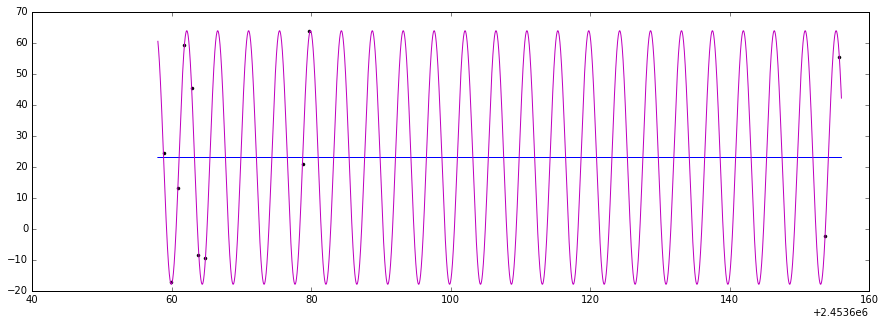

In [34]:
plt.figure(figsize=(15,5))
t = np.linspace(2453658, 2453756, num = 10000)
plt.plot(JD, V1481A, 'k.')
plt.plot(t, 23*np.ones(10000))
plt.plot(t, 23+1.88*np.cos((2*np.pi/4.433)*t)+40.85*np.sin((2*np.pi/4.433)*t), 'm')

In [8]:
np.matmul(V1481A, V1481B)

-10664.1536

In [10]:
np.sum(V1481A*V1481B)

-10664.1536

In [18]:
np.matmul()

array([ 24.36, -17.04,  13.26,  59.44,  45.43,  -8.61,  -9.37,  20.98,
        63.91,  -2.29,  55.55])